In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%load_ext line_profiler

# Synthetic data


In [88]:
np.random.seed(0)
n_feat = 5
size1, size2 = 10000, 10000
s1 = pd.DataFrame(np.random.normal(size=(size1, n_feat)))
s2 = pd.DataFrame(s1.values[:size2] + np.random.normal(scale=1, size=(size2, n_feat)))

In [89]:
s1.head()

,0,1,2,3,4
0,1.764052,0.400157,0.978738,2.240893,1.867558
1,-0.977278,0.950088,-0.151357,-0.103219,0.410599
2,0.144044,1.454274,0.761038,0.121675,0.443863
3,0.333674,1.494079,-0.205158,0.313068,-0.854096
4,-2.552990,0.653619,0.864436,-0.742165,2.269755


In [90]:
s2.head()

,0,1,2,3,4
0,1.830093,2.100139,-0.640478,1.644517,-0.249936
1,-1.840353,1.346560,-0.778127,-2.110026,-1.322779
2,0.493008,1.071280,2.793770,2.109261,0.711589
3,-1.113763,1.843523,-1.069373,-0.188375,1.219978
4,-2.941288,0.221881,0.458532,0.265925,1.574735


# Testing

In [91]:
import big_roc

In [92]:
sim_min = -1
sim_max = 1
eps = 1e-4
n_intervals = 100
intervals = np.linspace(sim_min - eps, sim_max + eps, n_intervals)

In [93]:
%%time
gen_hist, imp_hist = big_roc.calc_gen_imp_hist(s1, s2, intervals, batch_size=1000)

Wall time: 11.4 s


In [102]:
conf_mat = big_roc.calc_confusion_matrices(gen_hist, imp_hist)

In [103]:
conf_mat['fpr'] = big_roc.fpr(conf_mat)
conf_mat['fnr'] = big_roc.fnr(conf_mat)

In [111]:
eer = conf_mat.iloc[(conf_mat['fpr'] - conf_mat['fnr']).abs().idxmin()]

In [145]:
def line_identity_point(x1, y1, x2, y2, eps=1e-6):
    if abs(x1 - x2) < eps or abs(y1 - y2) < eps:
        return x1 if abs(x1 - x2) < abs(y1 - y2) else y1
    a = (y2 - y1) / (x2 - x1)
    b = y1 - a * x1
    c = b / (1 - a)
    return c

def find_identity(x, y, eps=1e-6):
    i = np.where(values >= 0, values, np.inf).argmin()
    j = np.where(values < 0, values, -np.inf).argmax()
    print(i, j)

    eer = line_identity_point(fpr[i], fnr[i], fpr[j], fnr[j], eps)

    eer_min = max(fnr[i], fpr[j])
    eer_max = min(fpr[i], fnr[j])
    error = max(eer - eer_min, eer_max - eer)
    
    return eer, eer_min, eer_max, error

def calc_eer(fpr, fnr, eps=1e-6):
    return find_identity(x, y, eps=1e-6)


def calc_fnr_at_fpr(fpr, fnr, fpr_value):
    diff = fpr - fpr_value
    i = np.where(diff >= 0, diff, np.inf).argmin()
    j = np.where(diff < 0, diff, -np.inf).argmax()
    
    
    

def calc_eer(fpr, fnr, eps=1e-6):
    # fpr is non-increasing, fnr is non-decreasing (check accounting the floating point operations error)
    assert np.all(np.diff(fpr) < eps)
    assert np.all(np.diff(fnr) > -eps)
    diff = fpr - fnr
    i = np.where(diff >= 0, diff, np.inf).argmin()
    j = np.where(diff < 0, diff, -np.inf).argmax()
    print(i, j)

    eer = line_identity_point(fpr[i], fnr[i], fpr[j], fnr[j], eps)

    eer_min = max(fnr[i], fpr[j])
    eer_max = min(fpr[i], fnr[j])
    error = max(eer - eer_min, eer_max - eer)
    
    return eer, eer_min, eer_max, error

def calc_

In [141]:
_ = (conf_mat['fpr'].values - conf_mat['fnr'].values)

In [144]:
_[_ < 0]

array([-0.02354935, -0.04963116, -0.07450627, -0.10229648, -0.13133023,
       -0.16133309, -0.19127571, -0.21965273, -0.24995915, -0.28366164,
       -0.31657454, -0.35318976, -0.39186771, -0.43510278, -0.47970088,
       -0.52233046, -0.56537581, -0.61302634, -0.66199031, -0.70973469,
       -0.76175181, -0.81703293, -0.87115223, -0.91891399, -0.95940146,
       -0.98850028, -1.        , -1.        ])

In [147]:
calc_eer(conf_mat['fpr'].values, conf_mat['fnr'].values)

72 73


(0.1820244380169731, 0.1815, 0.1825143414341434, 0.0005244380169731055)

In [119]:
conf_mat['fpr']

0      1.000000
1      0.999699
2      0.998794
3      0.997306
4      0.995238
5      0.992610
6      0.989441
7      0.985722
8      0.981486
9      0.976736
10     0.971487
11     0.965734
12     0.959512
13     0.952821
14     0.945683
15     0.938104
16     0.930099
17     0.921677
18     0.912856
19     0.903652
20     0.894077
21     0.884122
22     0.873816
23     0.863168
24     0.852195
25     0.840903
26     0.829306
27     0.817434
28     0.805279
29     0.792838
         ...   
71     0.194677
72     0.182514
73     0.170651
74     0.159069
75     0.147794
76     0.136804
77     0.126170
78     0.115867
79     0.105924
80     0.096347
81     0.087141
82     0.078338
83     0.069925
84     0.061910
85     0.054332
86     0.047197
87     0.040499
88     0.034270
89     0.028524
90     0.023274
91     0.018510
92     0.014265
93     0.010548
94     0.007367
95     0.004748
96     0.002686
97     0.001199
98     0.000300
99     0.000000
100    0.000000
Name: fpr, Length: 101, 

In [113]:
eer

tp     8.185000e+03
fn     1.815000e+03
fp     1.824961e+07
tn     8.174039e+07
fpr    1.825143e-01
fnr    1.815000e-01
Name: 72, dtype: float64

(array([ 2326164.,  7307699., 11080221., 13617796., 14914605., 14973982.,
        13797343., 11380820.,  7739236.,  2852134.]),
 array([-1.0001e+00, -7.9999e-01, -5.9988e-01, -3.9977e-01, -1.9966e-01,
         4.5000e-04,  2.0056e-01,  4.0067e-01,  6.0078e-01,  8.0089e-01,
         1.0010e+00]),
 <a list of 10 Patch objects>)

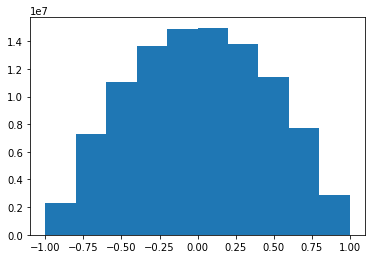

In [16]:
plt.hist(, weights=imp_hist)

In [164]:
results

[(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0], dtype=int64),
  array([ 0, 14, 32, 44, 52, 54, 64, 68, 40, 12,  0], dtype=int64)),
 (array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0], dtype=int64),
  array([ 0, 14, 32, 44, 52, 54, 64, 68, 40, 12,  0], dtype=int64)),
 (array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0], dtype=int64),
  array([ 0, 14, 32, 44, 52, 54, 64, 68, 40, 12,  0], dtype=int64)),
 (array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0], dtype=int64),
  array([ 0,  8, 44, 36, 90, 70, 46, 36, 44,  6,  0], dtype=int64)),
 (array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0], dtype=int64),
  array([ 0,  8, 44, 36, 90, 70, 46, 36, 44,  6,  0], dtype=int64)),
 (array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0], dtype=int64),
  array([ 0,  8, 44, 36, 90, 70, 46, 36, 44,  6,  0], dtype=int64)),
 (array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0], dtype=int64),
  array([ 0,  2,  2,  6, 30, 14, 10,  8, 12,  6,  0], dtype=int64)),
 (array([ 0,  0,  0,  0,  0,  0,  0,  0, 

In [157]:
batches = list(itertools.product(more_itertools.divide(n_workers, list(split(s1, 10))),
                                more_itertools.divide(n_workers, list(split(s2, 10)))))

In [158]:
batches

[(<tuple_iterator at 0x2a0051649b0>, <tuple_iterator at 0x2a005164908>),
 (<tuple_iterator at 0x2a0051649b0>, <tuple_iterator at 0x2a005164860>),
 (<tuple_iterator at 0x2a005164278>, <tuple_iterator at 0x2a005164908>),
 (<tuple_iterator at 0x2a005164278>, <tuple_iterator at 0x2a005164860>)]

In [153]:
results[0][3]

[]

In [83]:
batches = calc_gen_imp_hist(s1, s2, intervals, batch_size=1000)

In [85]:
import more_itertools

In [84]:
batches

[(<tuple_iterator at 0x2a004868da0>, <tuple_iterator at 0x2a00486b080>),
 (<tuple_iterator at 0x2a004868da0>, <tuple_iterator at 0x2a00486be80>),
 (<tuple_iterator at 0x2a004868da0>, <tuple_iterator at 0x2a00486b400>),
 (<tuple_iterator at 0x2a004868da0>, <tuple_iterator at 0x2a00486b3c8>),
 (<tuple_iterator at 0x2a004868da0>, <tuple_iterator at 0x2a00486b470>),
 (<tuple_iterator at 0x2a004868da0>, <tuple_iterator at 0x2a004871358>),
 (<tuple_iterator at 0x2a004868da0>, <tuple_iterator at 0x2a0048713c8>),
 (<tuple_iterator at 0x2a004868da0>, <tuple_iterator at 0x2a004871438>),
 (<tuple_iterator at 0x2a004868c50>, <tuple_iterator at 0x2a00486b080>),
 (<tuple_iterator at 0x2a004868c50>, <tuple_iterator at 0x2a00486be80>),
 (<tuple_iterator at 0x2a004868c50>, <tuple_iterator at 0x2a00486b400>),
 (<tuple_iterator at 0x2a004868c50>, <tuple_iterator at 0x2a00486b3c8>),
 (<tuple_iterator at 0x2a004868c50>, <tuple_iterator at 0x2a00486b470>),
 (<tuple_iterator at 0x2a004868c50>, <tuple_iterato

In [75]:
batches = list(batches)

In [82]:
list(batches[0][0])

[            0         1         2         3         4         5         6  \
 0    1.764052  0.400157  0.978738  2.240893  1.867558 -0.977278  0.950088   
 1    0.144044  1.454274  0.761038  0.121675  0.443863  0.333674  1.494079   
 2   -2.552990  0.653619  0.864436 -0.742165  2.269755 -1.454366  0.045759   
 3    0.154947  0.378163 -0.887786 -1.980796 -0.347912  0.156349  1.230291   
 4   -1.048553 -1.420018 -1.706270  1.950775 -0.509652 -0.438074 -1.252795   
 5   -0.895467  0.386902 -0.510805 -1.180632 -0.028182  0.428332  0.066517   
 6   -0.672460 -0.359553 -0.813146 -1.726283  0.177426 -0.401781 -1.630198   
 7    0.729091  0.128983  1.139401 -1.234826  0.402342 -0.684810 -0.870797   
 8   -1.165150  0.900826  0.465662 -1.536244  1.488252  1.895889  1.178780   
 9   -0.403177  1.222445  0.208275  0.976639  0.356366  0.706573  0.010500   
 10   1.883151 -1.347759 -1.270485  0.969397 -1.173123  1.943621 -0.413619   
 11   1.867559  0.906045 -0.861226  1.910065 -0.268003  0.802456

In [66]:
batches = list(batches)

In [67]:
batch = batches[0]

In [68]:
batches

In [72]:
x[1]

,0,1,2,3,4,5,6,7,8,9
1000,-0.202117,-0.833231,1.733600,0.190649,-0.177810,-1.085025,0.972262,1.431472,-0.245073,-0.623254
1001,-0.395999,-1.358522,1.322603,0.003444,-0.000197,1.533704,-0.773082,-0.401255,-0.115357,1.011555
1002,1.513236,0.917069,0.728893,0.552032,-2.803234,-0.396053,-0.713144,1.300834,-0.552866,2.070897
1003,-0.365908,-0.897630,1.444936,0.172942,0.282688,1.090870,-0.201348,-0.680686,0.803275,-0.342164
1004,-0.472489,-0.692257,-0.046671,-0.619580,0.869526,-0.146883,0.328092,-1.363043,0.807834,0.660664
1005,0.778850,1.507320,0.379576,0.651930,0.352000,-0.483739,-0.135743,-0.134971,1.005336,-0.854325
1006,-1.794765,0.982911,0.802775,-0.467396,-1.414233,-1.119993,0.887197,0.076282,1.223129,-0.665636
1007,-0.341274,-0.504656,0.327573,1.142387,0.746531,1.791056,-0.072537,1.247682,0.071143,-1.847773
1008,1.965915,-0.241074,-0.157804,0.525458,-1.911671,0.934805,0.845946,0.118465,0.502914,-0.198277
1009,0.765536,0.907339,0.197391,1.373848,-0.989330,-0.989102,-2.476985,0.770254,-0.086127,-0.857668


In [27]:
len(results)

64

In [37]:
res_agg = np.sum([res[0] for res in results], axis=0), np.sum([res[1] for res in results], axis=0)

In [54]:
res_agg[1].sum()

39996000

C:\Users\v_p164\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\v_p164\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


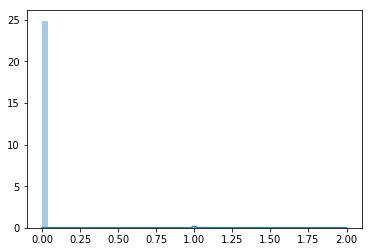

In [50]:
sns.distplot(res_agg[0])

In [14]:
%%time
results = calc_gen_imp_hist(s1, s2, intervals, batch_size=1000, n_workers=1)

Wall time: 35.1 s


In [28]:
%lprun -f calc_gen_imp_hist calc_gen_imp_hist(s1, s2, intervals, batch_size=10000)

Timer unit: 1e-07 s

Total time: 0.104059 s
File: C:\Users\v_p164\Projects\bigROC\big_roc\big_roc.py
Function: calc_gen_imp_hist at line 46

Line #      Hits         Time  Per Hit   % Time  Line Contents
    46                                           def calc_gen_imp_hist(s1: pd.DataFrame, s2: pd.DataFrame, bin_edges: np.array, batch_size: int = 10000,
    47                                                                 similarity_measure: Callable = cosine_similarity, n_workers: int = multiprocessing.cpu_count()) \
    48                                                   -> Tuple[np.array, np.array]:
    49         1     910920.0 910920.0     87.5      p = multiprocessing.Pool(n_workers)
    50         1         33.0     33.0      0.0      func = partial(_calc_gen_imp_hist,
    51         1      16378.0  16378.0      1.6                     s2_batches=split(s2, batch_size), bin_edges=bin_edges, similarity_measure=similarity_measure
    52                                           

In [12]:
%%time
calc_gen_imp_hist_c(s1, s2, intervals, batch_size=10000)

Wall time: 13.6 s


(array([[-0.998, -0.996, -0.994, ...,  0.996,  0.998,  1.   ],
        [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ]]),
 array([[-0.998, -0.996, -0.994, ...,  0.996,  0.998,  1.   ],
        [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ]]))

In [ ]:
%%time
calc_gen_imp_hist(s1, s2, intervals, batch_size=10000)

In [ ]:
calc_gen_imp_hist calc_gen_imp_hist(s1, s2, intervals, batch_size=10000)

In [18]:
gen_bins

array([[-0.998, -0.996, -0.994, ...,  0.996,  0.998,  1.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ]])